*Part 4: Working with Text Data*
#The NLTK library#

In the last part of the tutorial we learned about string manipulation and regular expressions. In this tutorial we will take a look at how we can work with larger amounts of text data comfortably using the **NLTK library**. We will also have a quick look at wordclouds and if time allows some advanced topics.

## Getting help

We are selective in this tutorial and only discuss elements that we believe are most important for the purpose of this class. If you want more details, you can consult, for example, the **Python Standard Library Reference** at https://docs.python.org/3/library/ or the **Language Reference** at https://docs.python.org/3/reference/. But be warned: the amount of detail in these sources can be overwhelming. For **quick and easy-to-understand overviews** of different topics see, for example, https://www.w3schools.com/python/. Here are some specific references for today's tutorial:

NLTK:
* https://www.nltk.org/book/

If you get stuck or don't remember how to do something, it is usually a good idea to **Google** your problem. Python has a large (and fast-growing) community and you will probably find answers to most of your questions online (e.g. on **Stack Overflow** or in a **Youtube tutorial**).

## Analyzing text data with NLTK

Now that we know how to clean and prepare text data, we can start to work with it. There are two popular libraries that allow you to do this: ``NLTK`` and ``spacy``. In this tutorial, we will focus on NLTK (Natural Language Toolkit).

Let's first fetch the text from the cat page on Wikipedia so we have an example text to work with:

In [56]:
# Import modules
import re
import requests
from bs4 import BeautifulSoup as bs

# Get page and convert to json
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Cat&format=json").json()

# Get text and convert to BeautifulSoup object
r_text = r["parse"]["text"]["*"]
soup = bs(r_text)

# Get list of all paragraphs 
pars = soup.find_all("p")

# Remove HTML tags (get text)
pars = [par.get_text() for par in pars]
        
# Join paragraphs to one string        
myString = ' '.join(pars)

# Convert string to lower case and remove citations
myString = myString.lower() 
myString = re.sub(r"\[\d+\]", "", myString)

The first few lines of the text look as follows:

In [57]:
myString[:500]

'\n the cat (felis catus) is a domestic species of small carnivorous mammal. it is the only domesticated species in the family felidae and is commonly referred to as the domestic cat or house cat to distinguish it from the wild members of the family. cats are commonly kept as house pets but can also be farm cats or feral cats; the feral cat ranges freely and avoids human contact. domestic cats are valued by humans for companionship and their ability to kill small rodents. about 60 cat breeds are r'

Let's now **import the NLTK library** so we can work with this text. 

In [58]:
# If you don't work on Colab: pip install nltk
import nltk

The NLTK library comes with many resources (e.g. a large collection of books) and packages that you need to download if you want to work with them. Let's **download the most popular ones**:

In [ ]:
nltk.download('popular')

###Tokenization

A first thing you may want to do is to split your text into different components – usually words. This is called **tokenization**. NLTK has a series of tokenizers that allow you to do this conveniently. You can think of them as more sophisitcated versions of the ``split()`` method. **To separate all the words, you can use the ``word_tokenize`` method**: 

In [60]:
from nltk.tokenize import word_tokenize

In [61]:
tokens = word_tokenize(myString)
print(tokens)

['the', 'cat', '(', 'felis', 'catus', ')', 'is', 'a', 'domestic', 'species', 'of', 'small', 'carnivorous', 'mammal', '.', 'it', 'is', 'the', 'only', 'domesticated', 'species', 'in', 'the', 'family', 'felidae', 'and', 'is', 'commonly', 'referred', 'to', 'as', 'the', 'domestic', 'cat', 'or', 'house', 'cat', 'to', 'distinguish', 'it', 'from', 'the', 'wild', 'members', 'of', 'the', 'family', '.', 'cats', 'are', 'commonly', 'kept', 'as', 'house', 'pets', 'but', 'can', 'also', 'be', 'farm', 'cats', 'or', 'feral', 'cats', ';', 'the', 'feral', 'cat', 'ranges', 'freely', 'and', 'avoids', 'human', 'contact', '.', 'domestic', 'cats', 'are', 'valued', 'by', 'humans', 'for', 'companionship', 'and', 'their', 'ability', 'to', 'kill', 'small', 'rodents', '.', 'about', '60', 'cat', 'breeds', 'are', 'recognized', 'by', 'various', 'cat', 'registries', '.', 'the', 'cat', 'is', 'similar', 'in', 'anatomy', 'to', 'the', 'other', 'felid', 'species', ':', 'it', 'has', 'a', 'strong', 'flexible', 'body', ',', 'q

As you can see, we now have a list with all the words where puctuation is treated as a separate token. This list can now be converted into an **nltk Text object**:

In [62]:
text = nltk.Text(tokens)
print(text)
type(text)

<Text: the cat ( felis catus ) is a...>


nltk.text.Text

There are many useful functions and methods you can apply to these ``Text`` objects. We will now get to know a few of them.

### Word frequencies

A first thing we may want to know is how frequent the different words are. You can use the **``count`` method to get the frequency for a particular word**:

In [63]:
text.count("cat")

113

But what if we wanted to have the **frequencies for all the words**? We can obtain them using the **``FreqDist`` function**:

In [64]:
fdist = nltk.FreqDist(text)

In [65]:
fdist

FreqDist({',': 459, 'the': 387, '.': 363, 'of': 242, 'and': 241, 'to': 218, 'a': 194, 'in': 185, 'cats': 182, 'cat': 113, ...})

In [66]:
type(fdist)

nltk.probability.FreqDist

We got a FreqDist object that looks like a dictionary and contains all the words in our vocabulary and the number of times they ocurr in our corpus. We can treat this object like a dictionary. For example, its keys correspond to our vocabulary:

 

In [67]:
vocabulary = fdist.keys()
print(vocabulary)

dict_keys(['the', 'cat', '(', 'felis', 'catus', ')', 'is', 'a', 'domestic', 'species', 'of', 'small', 'carnivorous', 'mammal', '.', 'it', 'only', 'domesticated', 'in', 'family', 'felidae', 'and', 'commonly', 'referred', 'to', 'as', 'or', 'house', 'distinguish', 'from', 'wild', 'members', 'cats', 'are', 'kept', 'pets', 'but', 'can', 'also', 'be', 'farm', 'feral', ';', 'ranges', 'freely', 'avoids', 'human', 'contact', 'valued', 'by', 'humans', 'for', 'companionship', 'their', 'ability', 'kill', 'rodents', 'about', '60', 'breeds', 'recognized', 'various', 'registries', 'similar', 'anatomy', 'other', 'felid', ':', 'has', 'strong', 'flexible', 'body', ',', 'quick', 'reflexes', 'sharp', 'teeth', 'retractable', 'claws', 'adapted', 'killing', 'prey', 'like', 'mice', 'rats', 'its', 'night', 'vision', 'sense', 'smell', 'well', 'developed', 'communication', 'includes', 'vocalizations', 'meowing', 'purring', 'trilling', 'hissing', 'growling', 'grunting', 'cat-specific', 'language', 'although', 'so

If we would like to know the **most common words**, we can apply the **``most_common`` method** to the FreqDist object:

In [68]:
fdist.most_common(20)

[(',', 459),
 ('the', 387),
 ('.', 363),
 ('of', 242),
 ('and', 241),
 ('to', 218),
 ('a', 194),
 ('in', 185),
 ('cats', 182),
 ('cat', 113),
 ('as', 96),
 ('are', 95),
 ('is', 93),
 ('with', 69),
 ('that', 63),
 ('their', 62),
 ('or', 54),
 ('have', 52),
 ('domestic', 51),
 ('by', 51)]

We can also **plot the most common words using the ``plot`` method**:

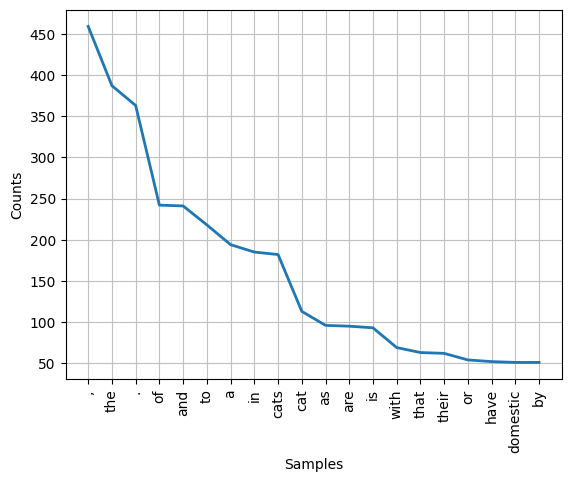

<Axes: xlabel='Samples', ylabel='Counts'>

In [69]:
fdist.plot(20)

### Stop words

You may have noticed that the statistics we computed about the most common words are not very informative. Almost all of the most common tokens are words such as "the", "and" or "to" that do not tell you anything about the content of the text.

Such words are called **stop words** and they are usually removed from a corpus for text analysis. You could define the words you would like to remove on your own, but NLTK has pre-defined lists for many laguanges that you can use (you will also find more such lists online). Let's import the list of English stop words:

In [70]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
len(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

Let's remove these words:

In [71]:
print(tokens)
tokens = [w for w in tokens if not w in stop_words]
print(tokens)

['the', 'cat', '(', 'felis', 'catus', ')', 'is', 'a', 'domestic', 'species', 'of', 'small', 'carnivorous', 'mammal', '.', 'it', 'is', 'the', 'only', 'domesticated', 'species', 'in', 'the', 'family', 'felidae', 'and', 'is', 'commonly', 'referred', 'to', 'as', 'the', 'domestic', 'cat', 'or', 'house', 'cat', 'to', 'distinguish', 'it', 'from', 'the', 'wild', 'members', 'of', 'the', 'family', '.', 'cats', 'are', 'commonly', 'kept', 'as', 'house', 'pets', 'but', 'can', 'also', 'be', 'farm', 'cats', 'or', 'feral', 'cats', ';', 'the', 'feral', 'cat', 'ranges', 'freely', 'and', 'avoids', 'human', 'contact', '.', 'domestic', 'cats', 'are', 'valued', 'by', 'humans', 'for', 'companionship', 'and', 'their', 'ability', 'to', 'kill', 'small', 'rodents', '.', 'about', '60', 'cat', 'breeds', 'are', 'recognized', 'by', 'various', 'cat', 'registries', '.', 'the', 'cat', 'is', 'similar', 'in', 'anatomy', 'to', 'the', 'other', 'felid', 'species', ':', 'it', 'has', 'a', 'strong', 'flexible', 'body', ',', 'q

We may want to remove the punctuation too:

In [72]:
punctuation = [punc for punc in "[]!?.,:;—()\"\'’`‘"] 
tokens = [w for w in tokens if not w in punctuation]
print(tokens)
# Note: This could also be done on the original string (myString) using a regex!

['cat', 'felis', 'catus', 'domestic', 'species', 'small', 'carnivorous', 'mammal', 'domesticated', 'species', 'family', 'felidae', 'commonly', 'referred', 'domestic', 'cat', 'house', 'cat', 'distinguish', 'wild', 'members', 'family', 'cats', 'commonly', 'kept', 'house', 'pets', 'also', 'farm', 'cats', 'feral', 'cats', 'feral', 'cat', 'ranges', 'freely', 'avoids', 'human', 'contact', 'domestic', 'cats', 'valued', 'humans', 'companionship', 'ability', 'kill', 'small', 'rodents', '60', 'cat', 'breeds', 'recognized', 'various', 'cat', 'registries', 'cat', 'similar', 'anatomy', 'felid', 'species', 'strong', 'flexible', 'body', 'quick', 'reflexes', 'sharp', 'teeth', 'retractable', 'claws', 'adapted', 'killing', 'small', 'prey', 'like', 'mice', 'rats', 'night', 'vision', 'sense', 'smell', 'well', 'developed', 'cat', 'communication', 'includes', 'vocalizations', 'like', 'meowing', 'purring', 'trilling', 'hissing', 'growling', 'grunting', 'well', 'cat-specific', 'body', 'language', 'although', 

Let's see if we get more interesting word frequency results after removing the stop words:

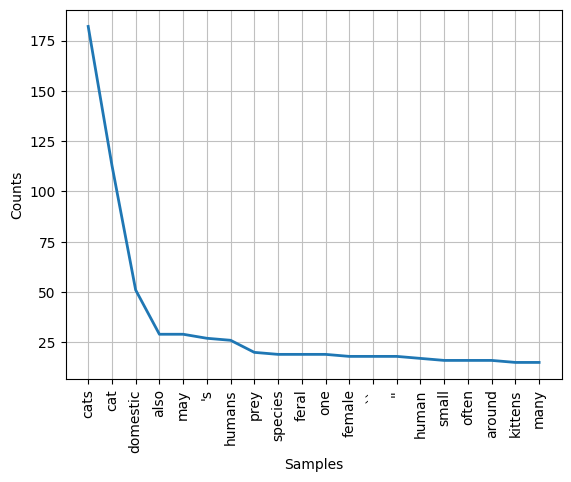

<Axes: xlabel='Samples', ylabel='Counts'>

In [73]:
text = nltk.Text(tokens)
fdist = nltk.FreqDist(text)
fdist.plot(20)

We may still have to do some more cleaning, but this already looks much better!


### Stemming

You may have noticed that "cat" and "cats" were treated as two different words. However, they are just different inflections of the same root. If you want to reduce words to their root form, you can use **stemming**. The NLTK library allows you to work with different stemmers. Let's look at two examples: the Porter stemmer and the Lancaster stemmer:

In [74]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
ps = PorterStemmer()
lan = LancasterStemmer()

In [75]:
print(ps.stem("cats"))
print(lan.stem("cats"))

cat
cat


In [76]:
words = ["give", "gives", "giving", "gave", "given"]
[ps.stem(word) for word in words]

['give', 'give', 'give', 'gave', 'given']

In [77]:
[lan.stem(word) for word in words]

['giv', 'giv', 'giv', 'gav', 'giv']

As you can see, the two stemmers work a bit differently. The Lancaster stemmer tends to be more aggressive (see last word).

><font color = 4e1585> SIDENOTE: Appart from stemming, we can also do **lemmatization**, where the context of a word is taken into account to generate an appropriate root form. If you want to know more about stemming and lemmatization, see, for example: 
* https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

Let's combine these methods:

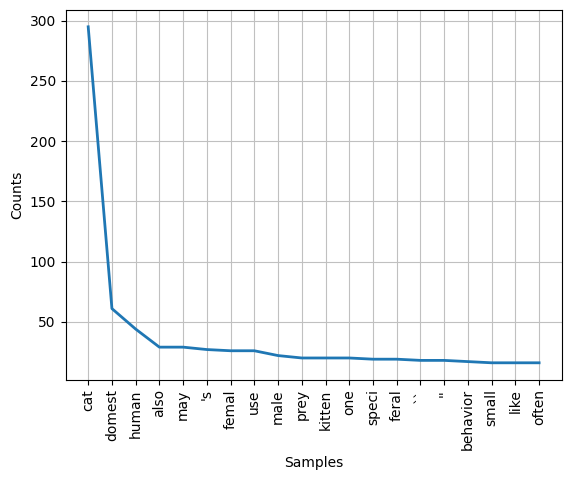

<Axes: xlabel='Samples', ylabel='Counts'>

In [78]:
tokens = [w for w in tokens if not w in stop_words]
punctuation = [punc for punc in "[]!?.,:;—()\"\'’`‘"] 
tokens = [w for w in tokens if not w in punctuation]
stemmed_text = [ps.stem(word) for word in tokens]
fdist = nltk.FreqDist(stemmed_text)
fdist.plot(20)

You see that still some work might be needed. Text analysis often is a "back and forth" between analyzing and cleaning as insufficient cleaning may show up only very late in your analyses.

### Part-of-speech tagging

The NLTK library allows you to easily implement many sopisticated Natural Langauge Processing tasks. For example, you can do  **part-of-speech tagging**.

In [79]:
tags = nltk.pos_tag(text)
print(tags)

[('cat', 'NN'), ('felis', 'NN'), ('catus', 'NN'), ('domestic', 'JJ'), ('species', 'NNS'), ('small', 'JJ'), ('carnivorous', 'JJ'), ('mammal', 'NN'), ('domesticated', 'VBD'), ('species', 'NNS'), ('family', 'NN'), ('felidae', 'VBZ'), ('commonly', 'RB'), ('referred', 'VBN'), ('domestic', 'JJ'), ('cat', 'NN'), ('house', 'NN'), ('cat', 'NN'), ('distinguish', 'JJ'), ('wild', 'JJ'), ('members', 'NNS'), ('family', 'NN'), ('cats', 'NNS'), ('commonly', 'RB'), ('kept', 'VBD'), ('house', 'NN'), ('pets', 'NNS'), ('also', 'RB'), ('farm', 'VBP'), ('cats', 'NNS'), ('feral', 'JJ'), ('cats', 'NNS'), ('feral', 'JJ'), ('cat', 'NN'), ('ranges', 'VBZ'), ('freely', 'RB'), ('avoids', 'JJ'), ('human', 'JJ'), ('contact', 'NN'), ('domestic', 'JJ'), ('cats', 'NNS'), ('valued', 'VBN'), ('humans', 'NNS'), ('companionship', 'VBP'), ('ability', 'NN'), ('kill', 'VB'), ('small', 'JJ'), ('rodents', 'NNS'), ('60', 'CD'), ('cat', 'NN'), ('breeds', 'NNS'), ('recognized', 'VBN'), ('various', 'JJ'), ('cat', 'NN'), ('registrie

In one line of code, all the words in your corpus were classified into their word groups (e.g. nouns = NN, adjectives = JJ, verbs = VB etc.)! This can be very useful. For example, you may only be interested in the nouns within your text: 

In [80]:
nouns = [tag[0] for tag in tags if tag[1] == "NN"]
print(nouns)

['cat', 'felis', 'catus', 'mammal', 'family', 'cat', 'house', 'cat', 'family', 'house', 'cat', 'contact', 'ability', 'cat', 'cat', 'anatomy', 'body', 'mice', 'night', 'vision', 'sense', 'smell', 'cat', 'communication', 'body', 'language', 'hunter', 'predator', 'i.e', 'dawn', 'dusk', 'frequency', 'spring', 'autumn', 'litter', 'pedigreed', 'cat', 'population', 'control', 'proliferation', 'abandonment', 'extinction', 'bird', 'mammal', 'reptile', 'domestication', 'egypt', 'bc', 'domestication', 'asia', 'bc', 'update', 'stray', 'world', 'cat', 'pet', 'cat', '%', 'cat', 'population', 'pet', 'origin', 'word', 'cat', 'catt', 'word', 'cattus', 'century', 'cattus', 'precursor', 'form', 'latin', 'word', 'language', 'word', 'kaddîska', 'nobiin', 'kadīs', 'word', 'loan', 'word', 'thence', 'syriac', 'arabic', 'word', 'cf', 'sami', 'gáđfi', 'stoat', 'hungarian', 'hölgy', 'stoat', 'puss', 'pussycat', 'century', 'dutch', 'puuskatte', 'kattepus', 'pus', 'pusekatt', 'puižė', 'puisín', 'puiscín', 'etymolo

There is much more you can do with the NLTK library. Check out the documentation to find out: https://www.nltk.org/book/

>  <font color='teal'> **In-class exercise**: Consider the the following string that contains the entire text of the book "David Copperfield" from Charles Dickens (downloaded from the website of project Gutenberg):

In [83]:
r = requests.get("https://www.gutenberg.org/files/766/766-h/766-h.htm") # Get page
soup = bs(r.text) # Convert to BeautifulSoup object
pars = soup.find_all("p") # Find all paragraphs
pars = [par.get_text() for par in pars] # REmove HTML tags within paragraphs
david = ' '.join(pars) # Join list of paragraphs to one string
david = david.lower() # Covert string to lower-case
david = re.sub(r"[^\w\s-]", "", david)  # Remove punctuation
david[20000:20500]

'\r\n \r\nyoull make yourself ill said miss betsey and you\r\nknow that will not be good either for you or for my god-daughter come you\r\nmustnt do it\r\n \r\nthis argument had some share in quieting my mother though her increasing\r\nindisposition had a larger one there was an interval of silence only broken\r\nby miss betseys occasionally ejaculating ha as she sat\r\nwith her feet upon the fender\r\n \r\ndavid had bought an annuity for himself with his money i know\r\nsaid she by and by what did he do for you\r\n \r\nmr '

>  <font color='teal'> Tokenize the text and assign the resulting list to a variable named ``david_tokens``.

In [84]:
from nltk.tokenize import word_tokenize
david_tokens = word_tokenize(david)
print(david_tokens[:100])

['affectionately', 'inscribed', 'to', 'the', 'hon', 'mr', 'and', 'mrs', 'richard', 'watson', 'of', 'rockingham', 'northamptonshire', 'i', 'do', 'not', 'find', 'it', 'easy', 'to', 'get', 'sufficiently', 'far', 'away', 'from', 'this', 'book', 'in', 'the', 'first', 'sensations', 'of', 'having', 'finished', 'it', 'to', 'refer', 'to', 'it', 'with', 'the', 'composure', 'which', 'this', 'formal', 'heading', 'would', 'seem', 'to', 'require', 'my', 'interest', 'in', 'it', 'is', 'so', 'recent', 'and', 'strong', 'and', 'my', 'mind', 'is', 'so', 'divided', 'between', 'pleasure', 'and', 'regretpleasure', 'in', 'the', 'achievement', 'of', 'a', 'long', 'design', 'regret', 'in', 'the', 'separation', 'from', 'many', 'companionsthat', 'i', 'am', 'in', 'danger', 'of', 'wearying', 'the', 'reader', 'whom', 'i', 'love', 'with', 'personal', 'confidences', 'and', 'private', 'emotions']


>  <font color='teal'> Remove the stopwords and create an NLTK text object.

In [85]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
david_tokens = [w for w in david_tokens if not w in stop_words]
print(david_tokens[:100])

['affectionately', 'inscribed', 'hon', 'mr', 'mrs', 'richard', 'watson', 'rockingham', 'northamptonshire', 'find', 'easy', 'get', 'sufficiently', 'far', 'away', 'book', 'first', 'sensations', 'finished', 'refer', 'composure', 'formal', 'heading', 'would', 'seem', 'require', 'interest', 'recent', 'strong', 'mind', 'divided', 'pleasure', 'regretpleasure', 'achievement', 'long', 'design', 'regret', 'separation', 'many', 'companionsthat', 'danger', 'wearying', 'reader', 'love', 'personal', 'confidences', 'private', 'emotions', 'besides', 'could', 'say', 'story', 'purpose', 'endeavoured', 'say', 'would', 'concern', 'reader', 'little', 'perhaps', 'know', 'sorrowfully', 'pen', 'laid', 'close', 'two-years', 'imaginative', 'task', 'author', 'feels', 'dismissing', 'portion', 'shadowy', 'world', 'crowd', 'creatures', 'brain', 'going', 'ever', 'yet', 'nothing', 'else', 'tell', 'unless', 'indeed', 'confess', 'might', 'less', 'moment', 'still', 'one', 'ever', 'believe', 'narrative', 'reading', 'beli

In [86]:
david_text = nltk.Text(david_tokens)

>  <font color='teal'>Print the 30 most common words in the corpus.

In [87]:
fdist = nltk.FreqDist(david_text)
fdist.most_common(30)

[('said', 2941),
 ('mr', 2468),
 ('little', 1088),
 ('would', 992),
 ('one', 886),
 ('could', 858),
 ('upon', 798),
 ('know', 783),
 ('micawber', 768),
 ('aunt', 752),
 ('miss', 710),
 ('peggotty', 701),
 ('mrs', 671),
 ('never', 660),
 ('much', 651),
 ('time', 641),
 ('old', 624),
 ('made', 620),
 ('like', 604),
 ('say', 600),
 ('think', 582),
 ('dear', 568),
 ('come', 562),
 ('see', 550),
 ('well', 550),
 ('us', 549),
 ('went', 549),
 ('good', 531),
 ('copperfield', 509),
 ('dont', 503)]

## Creating word clouds

One nice way of visualizing text data is through **word clouds**. Run the following code to get a text corpus we can work with:

In [99]:
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Sustainable_Development_Goals&format=json").json()
r_text = r["parse"]["text"]["*"]
soup = bs(r_text)
pars = soup.find_all("p")
pars = [par.get_text() for par in pars]    
myString = ' '.join(pars)
myString = myString.lower() 
myString = re.sub(r"[^\w\s-]", "", myString)

In [100]:
myString

'\n the sustainable development goals or global goals are a collection of seventeen interlinked objectives designed to serve as a shared blueprint for peace and prosperity for people and the planet now and into the future123 the sdgs are no poverty zero hunger good health and well-being quality education gender equality clean water and sanitation affordable and clean energy decent work and economic growth industry innovation and infrastructure reduced inequalities sustainable cities and communities responsible consumption and production climate action life below water life on land peace justice and strong institutions and partnerships for the goals the sdgs emphasize the interconnected environmental social and economic aspects of sustainable development by putting sustainability at their center4\n the sdgs were formulated in 2015 by the united nations general assembly unga as part of the post-2015 development agenda which sought to create a future global development framework to succee

### Creating simple word clouds

Now we are ready to get started. Let's first import the modules we are going to use. From the **``wordcloud`` library** we have to import the ``WordCloud`` class and a list of stopwords (you could also import the stopwords from ``nltk``). The ``wordcloud`` library  **builds on top of ``matplotlib``**, which is why we will import it too: 

In [ ]:
!pip install wordcloud

In [96]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS  # Could also take stopwords from nltk!
len(STOPWORDS) # 192 stopwords

192

We can now create a ``WordCloud`` object:

In [101]:
wc = WordCloud(stopwords=STOPWORDS)
type(wc)

wordcloud.wordcloud.WordCloud

To take a look at the word cloud, we must first **generate** it and then **show** the resulting image using the ``imshow`` function from matplotlib.pyplot:

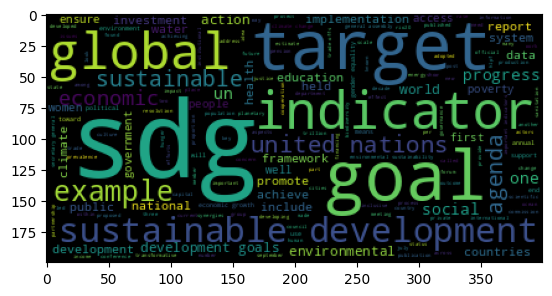

In [102]:
wc.generate(myString)
plt.imshow(wc)

And here we have our word cloud! There are many things you can **customize** (see here for the documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html). Let's change the background color and the size of the plot and remove the axes. We will also set a *random state* (seed of the random number generator) so that the same image is produced each time we run our script (you can choose any number):

(-0.5, 999.5, 999.5, -0.5)

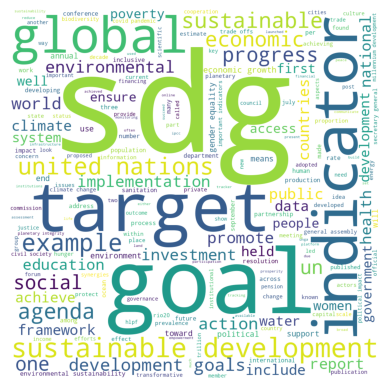

In [103]:
wc = WordCloud(background_color = "white", stopwords=STOPWORDS, 
               width=1000, height=1000, random_state=634)
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")

If we want to export our word cloud to our computer, we can use the ``to_file`` method: 

In [ ]:
wc.to_file("sdgs.png")

### Creating word clouds with custom masks

We can also create word clouds in non-rectangular shapes. This is done using **masks** meaning that we need to define a shape that will be masked out from the word cloud. To be able to do this, we will need to import the ``Image`` module:

In [104]:
from PIL import Image  

Now you can use this module to import an image of a shape you would like to mask. For example, we can import this image we found in the internet and convert it to a numpy array:

In [105]:
import numpy as np

# Solution 1: Retrieve image through url with requests
url = "https://www.dreamalittlebigger.com/wp-content/uploads/2014/01/cat-shape-dreamalittlebigger.jpg"
r = requests.get(url, stream=True).raw
my_mask = np.array(Image.open(r))

# Solution 2: Open image from your Drive (you need to place it there!)
#my_mask = np.array(Image.open("images/shape1.jpg")) 

In [107]:
my_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [106]:
my_mask.shape

(1396, 1980, 3)

As you can see, we got a three-dimensional array where the first two dimensions locate the pixels in the image while the third dimension corresponds to the three color channels. We can also take a look at the image using matplotlib:

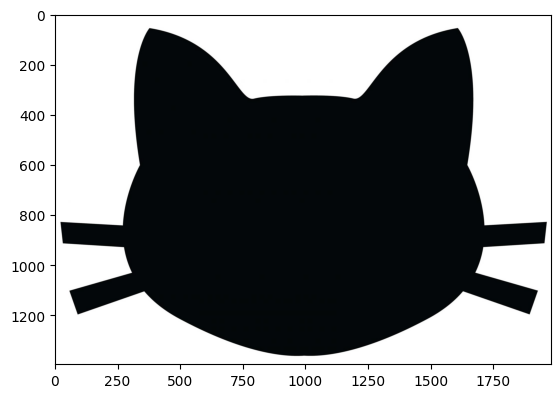

In [108]:
plt.imshow(my_mask)

How can we use this image to define the shape of our word cloud? When generating the word clouds, **all white entries will be masked out**. In the RGB color scheme, ``rgb(255, 255, 255)`` corresponds to white (``rgb(0, 0, 0)`` would correspond to black). Depending on your image, the values you want to mask out may not be perfectly white:

In [109]:
np.unique(my_mask, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

We can fix this easily:

In [110]:
my_mask[my_mask>20] = 255 # Set any number you consider appropriate as the boundary

Now we can create our world cloud simply by providing our mask as a further argument:

(-0.5, 1979.5, 1395.5, -0.5)

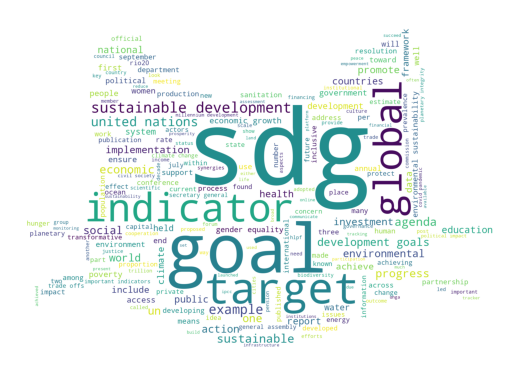

In [111]:
wc = WordCloud(background_color = "white",
               stopwords=STOPWORDS, mask=my_mask,
               random_state=1)
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")

We can also draw the contour of our plot. Let's do this with another image:

In [112]:
url = "https://drive.google.com/uc?export=download&id=1K-QGOcXnuNTTfBVsZRjTfTRbeYDEIcN4"
mask = np.array(Image.open(requests.get(url, stream=True).raw))

# Or: mask = np.array(Image.open("images/shape2.png")) 

(-0.5, 511.5, 511.5, -0.5)

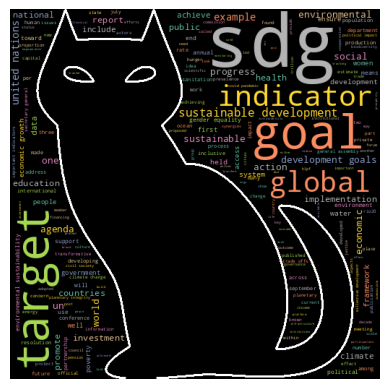

In [113]:
mask[mask>20] = 255

wc = WordCloud(background_color = "black",
               stopwords=STOPWORDS, mask=mask,
               random_state=3, colormap="Set2",
               contour_width = 3,
               contour_color="white")
wc.generate(myString)
plt.imshow(wc)
plt.axis("off")



---


>  <font color='teal'> **In-class exercise**: Retrieve a page of your choice from Wikipedia and create a wordcloud about it:

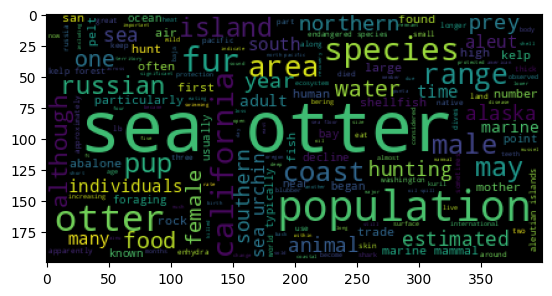

In [114]:
# Code to retrieve the text from the page (adapt page name!)
r = requests.get("https://en.wikipedia.org/w/api.php?action=parse&page=Sea otter&format=json").json()
r_text = r["parse"]["text"]["*"]
soup = bs(r_text)
pars = soup.find_all("p")
pars = [par.get_text() for par in pars]    
my_text = ' '.join(pars)
my_text = my_text.lower() 
my_text = re.sub(r"[^\w\s-]", "", my_text)

wc = WordCloud(stopwords=STOPWORDS)
wc.generate(my_text)
plt.imshow(wc)

## Where to go from here?

We can only give you a rough overview on the topic of text analysis but based on what you already know, it is quite easy to continue in different directions!



### Sentiment Analysis

One easy way to determine the sentiment of a text is provided by the "VADER lexicon", which is a rule-based tool, designed to work for small texts like social media.

In [115]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Some test strings
nice_one = "I love python! The best feature is, that I can create beautiful plots of Swiss maps."
bad_one = "I am learning python. It is very time consuming and hard. The worst part are the weekly exercises."
balanced_one = "I am excited to learn more about text analysis with python. The NLTK module has plenty of options and is convenient to use. However, its basic functionality is not as good as ChatGPT."

print(sid.polarity_scores(nice_one))
print(sid.polarity_scores(bad_one))
print(sid.polarity_scores(balanced_one))



{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'compound': 0.9402}
{'neg': 0.268, 'neu': 0.732, 'pos': 0.0, 'compound': -0.6705}
{'neg': 0.069, 'neu': 0.862, 'pos': 0.069, 'compound': -0.0015}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Further extensions could be to "zoom in" to a window around a term and evaluate the sentiment of neighboring words.

### Topic models

Another common next step would be to determine which topics exist in texts. We could spend a day -- or more -- on this, but we want to give you just a very quick teaser.

In [116]:
# lets use some example articles from Reuters:
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [117]:
reuters # this is a corpus, i.e. a collection of texts

<CategorizedPlaintextCorpusReader in '/root/nltk_data/corpora/reuters.zip/reuters/'>

In [118]:
# How do these texts look like?

# Retrieve the list of file identifiers in the Reuters corpus
reuters_files = reuters.fileids()
print(reuters.raw(reuters_files[2]))

JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS
  The Ministry of International Trade and
  Industry (MITI) will revise its long-term energy supply/demand
  outlook by August to meet a forecast downtrend in Japanese
  energy demand, ministry officials said.
      MITI is expected to lower the projection for primary energy
  supplies in the year 2000 to 550 mln kilolitres (kl) from 600
  mln, they said.
      The decision follows the emergence of structural changes in
  Japanese industry following the rise in the value of the yen
  and a decline in domestic electric power demand.
      MITI is planning to work out a revised energy supply/demand
  outlook through deliberations of committee meetings of the
  Agency of Natural Resources and Energy, the officials said.
      They said MITI will also review the breakdown of energy
  supply sources, including oil, nuclear, coal and natural gas.
      Nuclear energy provided the bulk of Japan's electric power
  in the fiscal year ended March

In [120]:
import nltk
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer

# some preprocessing

def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text.lower())

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
# create a document-term-matrix

import pandas as pd
from gensim import corpora
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Access the "reuters" corpus
reuters_files = reuters.fileids()

# Create a list to store the preprocessed tokens of each document
documents = []

# Get the set of stopwords and punctuation
stop_words = set(stopwords.words('english'))
#stop_words.update(['lt', 'dlrs', "'s", 'mln', 'pct', 'cts', 'shr'])
punctuation = set(string.punctuation)

# Iterate over the documents and preprocess/tokenize them
for file_id in reuters_files:
    text = reuters.raw(file_id)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and convert to lowercase
    tokens = [token.lower() for token in tokens if token not in punctuation]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]

    documents.append(tokens)

# Create a dictionary mapping tokens to their integer ids
dictionary = corpora.Dictionary(documents)

# Convert the tokenized documents into a document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in documents]


In [92]:
# How does a document term matrix look like?
print(len(doc_term_matrix)) # number of documents
print(len(dictionary)) # number of terms

num_documents_to_print = 2  # Number of documents to print

for doc_id in range(num_documents_to_print):
    print(f"Document ID: {doc_id}")
    document_terms = doc_term_matrix[doc_id]

    # Print the term frequencies for each term in the document
    for term_id, term_frequency in document_terms:
        term = dictionary.get(term_id)
        print(f"Term: {term}, Frequency: {term_frequency}")

    print()

10788
52502
Document ID: 0
Term: '', Frequency: 7
Term: 's, Frequency: 12
Term: 10, Frequency: 1
Term: 15.6, Frequency: 1
Term: 17, Frequency: 1
Term: 1985, Frequency: 1
Term: 30, Frequency: 1
Term: 300, Frequency: 1
Term: 4.9, Frequency: 1
Term: 53, Frequency: 1
Term: 7.1, Frequency: 1
Term: 95, Frequency: 1
Term: ``, Frequency: 7
Term: able, Frequency: 1
Term: accounting, Frequency: 1
Term: action, Frequency: 1
Term: advantage, Frequency: 1
Term: alleged, Frequency: 2
Term: allow, Frequency: 2
Term: also, Frequency: 4
Term: american, Frequency: 1
Term: among, Frequency: 2
Term: analyst, Frequency: 1
Term: april, Frequency: 1
Term: asia, Frequency: 1
Term: asian, Frequency: 2
Term: asked, Frequency: 1
Term: association, Frequency: 1
Term: australia, Frequency: 2
Term: australian, Frequency: 1
Term: avowed, Frequency: 1
Term: awaiting, Frequency: 1
Term: aware, Frequency: 1
Term: barriers, Frequency: 1
Term: beef, Frequency: 1
Term: below-cost, Frequency: 1
Term: beyond, Frequency: 1
T

In [93]:
from gensim.models import LdaModel

# Define the number of topics that we expect to exist
num_topics = 5

# Train a so called "LDA model"
lda_model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)


In [122]:
# Extract the most exclusive terms per topic
num_terms = 10  

for topic_id in range(num_topics):
    topic_terms = lda_model.get_topic_terms(topicid=topic_id, topn=num_terms)
    topic_terms = [dictionary.get(term_id) for term_id, _ in topic_terms]
    
    print(f"Topic {topic_id + 1}:")
    print(", ".join(topic_terms))
    print()

Topic 1:
pct, said, year, mln, billion, tonnes, 1986, january, february, 's

Topic 2:
vs, mln, cts, net, loss, dlrs, shr, lt, profit, qtr

Topic 3:
mln, billion, oil, dlrs, bank, pct, said, stg, reserves, money

Topic 4:
said, ``, '', 's, u.s., would, trade, market, japan, dollar

Topic 5:
said, lt, company, dlrs, shares, 's, inc, corp, pct, mln



Which topics occur in a text can, e.g., be a predictor in a model. 

On the other hand, how likely a topic is obeserved in a text can also be a dependent variable in a "structural topic model", e.g., to see how topics developed over time or whether they correlate with other features.